# Car Price Prediction in the US Market
Here we aims to analyze the key factors affecting car prices in the US and build predictive models using various regression algorithms.

**Business Objective:**
- Understand which variables affect car price.
- Predict car price using machine learning models.
- Identify the best-performing model

### 1. Load and Preprocess the Data

In [11]:
# Import library
import pandas as pd

# Load dataset
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
#Display data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [17]:
# Check for null values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [19]:
# Drop ID column and extract brand from CarName
df.drop('car_ID', axis=1, inplace=True)
df['CarBrand'] = df['CarName'].apply(lambda x: x.split()[0].lower())
df.drop('CarName', axis=1, inplace=True)

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [23]:
print(df.head())

   symboling fueltype aspiration doornumber      carbody drivewheel  \
0          3      gas        std        two  convertible        rwd   
1          3      gas        std        two  convertible        rwd   
2          1      gas        std        two    hatchback        rwd   
3          2      gas        std       four        sedan        fwd   
4          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  boreratio  \
0          front       88.6      168.8      64.1  ...        mpfi       3.47   
1          front       88.6      168.8      64.1  ...        mpfi       3.47   
2          front       94.5      171.2      65.5  ...        mpfi       2.68   
3          front       99.8      176.6      66.2  ...        mpfi       3.19   
4          front       99.4      176.6      66.4  ...        mpfi       3.19   

  stroke compressionratio  horsepower peakrpm  citympg  highwaympg    price  \
0   2.68     

#### Convert Categorical Variables to Numeric
We use one-hot encoding to convert text columns into numeric values.

In [26]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_toyouta,CarBrand_vokswagen,CarBrand_volkswagen,CarBrand_volvo,CarBrand_vw
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,False,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,False,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,False,False,False


### 2. Model Implementation
We will use the following regression algorithms to predict car prices:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- Support Vector Regressor (SVR)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Linear Regression
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
preds_lr = model_lr.predict(X_test)

print("R2 Score:", r2_score(y_test, preds_lr))
print("MSE:", mean_squared_error(y_test, preds_lr))
print("MAE:", mean_absolute_error(y_test, preds_lr))

R2 Score: 0.9095967004509726
MSE: 7136799.967188367
MAE: 1820.6194871069101


In [43]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
preds_dt = model_dt.predict(X_test)

print("R2 Score:", r2_score(y_test, preds_dt))
print("MSE:", mean_squared_error(y_test, preds_dt))
print("MAE:", mean_absolute_error(y_test, preds_dt))

R2 Score: 0.8837301043539388
MSE: 9178813.069558268
MAE: 2070.187


In [45]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
preds_rf = model_rf.predict(X_test)

print("R2 Score:", r2_score(y_test, preds_rf))
print("MSE:", mean_squared_error(y_test, preds_rf))
print("MAE:", mean_absolute_error(y_test, preds_rf))

R2 Score: 0.9575633729682583
MSE: 3350117.9704560596
MAE: 1296.5394634146342


In [47]:
# Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)
preds_gb = model_gb.predict(X_test)

print("R2 Score:", r2_score(y_test, preds_gb))
print("MSE:", mean_squared_error(y_test, preds_gb))
print("MAE:", mean_absolute_error(y_test, preds_gb))

R2 Score: 0.9285842676352174
MSE: 5637845.066941442
MAE: 1686.9428540292772


In [49]:
# Support Vector Regression
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train_scaled, y_train)
preds_svr = model_svr.predict(X_test_scaled)

print("R2 Score:", r2_score(y_test, preds_svr))
print("MSE:", mean_squared_error(y_test, preds_svr))
print("MAE:", mean_absolute_error(y_test, preds_svr))

R2 Score: -0.10068574412496178
MSE: 86892558.36614253
MAE: 5701.502460013676


### 3. Model Evaluation
We compare all models based on three evaluation metrics:
- **R² Score**: Higher is better
- **MSE & MAE**: Lower is better
This will help us identify the best-performing model for predicting car prices.

In [54]:
# Compare all model scores
results = {
    "Linear Regression": [r2_score(y_test, preds_lr), mean_squared_error(y_test, preds_lr), mean_absolute_error(y_test, preds_lr)],
    "Decision Tree": [r2_score(y_test, preds_dt), mean_squared_error(y_test, preds_dt), mean_absolute_error(y_test, preds_dt)],
    "Random Forest": [r2_score(y_test, preds_rf), mean_squared_error(y_test, preds_rf), mean_absolute_error(y_test, preds_rf)],
    "Gradient Boosting": [r2_score(y_test, preds_gb), mean_squared_error(y_test, preds_gb), mean_absolute_error(y_test, preds_gb)],
    "SVR": [r2_score(y_test, preds_svr), mean_squared_error(y_test, preds_svr), mean_absolute_error(y_test, preds_svr)]
}

summary_df = pd.DataFrame(results, index=["R2 Score", "MSE", "MAE"]).T
summary_df.sort_values(by="R2 Score", ascending=False)

,R2 Score,MSE,MAE
Random Forest,0.957563,3.350118e+06,1296.539463
Gradient Boosting,0.928584,5.637845e+06,1686.942854
Linear Regression,0.909597,7.136800e+06,1820.619487
Decision Tree,0.883730,9.178813e+06,2070.187000
SVR,-0.100686,8.689256e+07,5701.502460


#### Model Comparison Graphical Representations

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_actual_vs_pred(y_true, y_pred, title):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.7)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"Actual vs Predicted - {title}")
    plt.grid(True)
    plt.show()


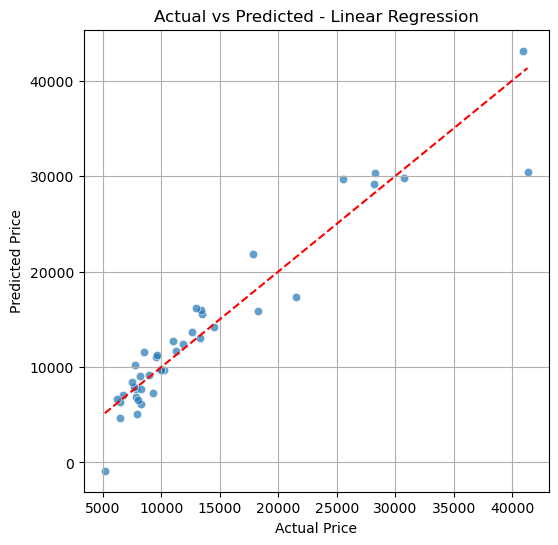

In [61]:
# Linear Regression
plot_actual_vs_pred(y_test, preds_lr, "Linear Regression")

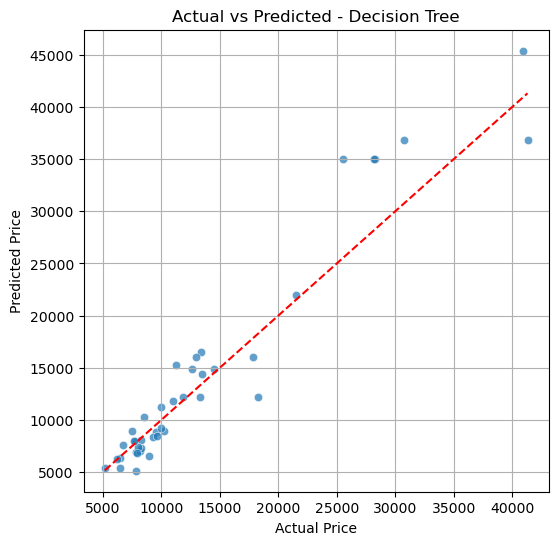

In [63]:
# Decision Tree
plot_actual_vs_pred(y_test, preds_dt, "Decision Tree")

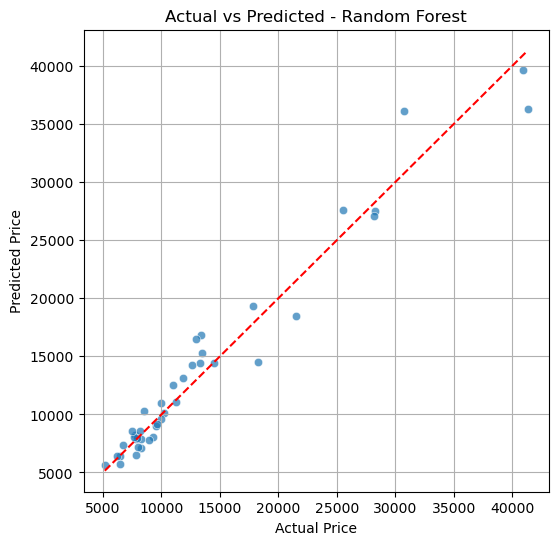

In [65]:
# Random Forest
plot_actual_vs_pred(y_test, preds_rf, "Random Forest")

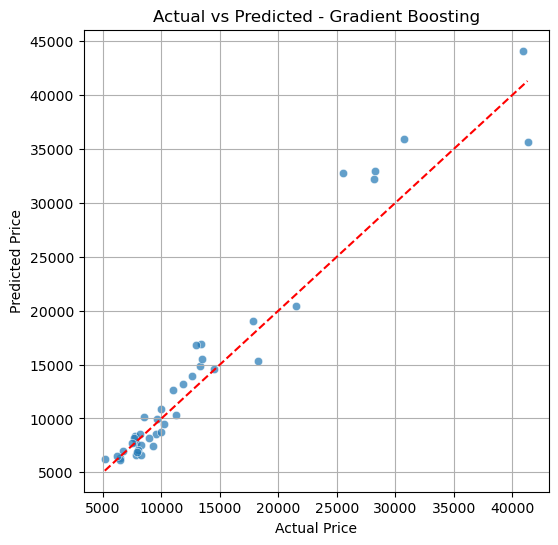

In [67]:
# Gradient Boosting
plot_actual_vs_pred(y_test, preds_gb, "Gradient Boosting")

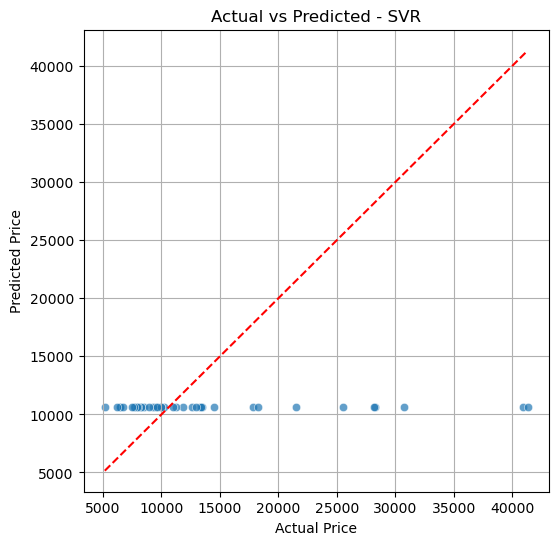

In [69]:
# SVR
plot_actual_vs_pred(y_test, preds_svr, "SVR")

#### Model Comparison on R², MSE, MAE

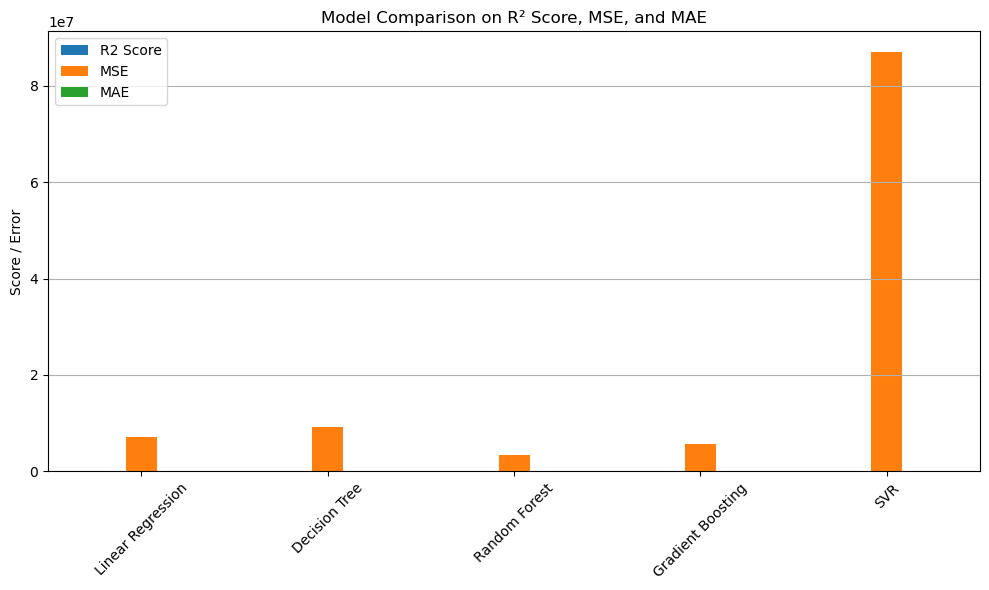

In [74]:
summary_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison on R² Score, MSE, and MAE")
plt.ylabel("Score / Error")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Best Performing Model: Random Forest Regressor

**Highest R² Score (≈ 0.96)**
- Indicates it explains ~96% of the variability in car prices.
- Much better generalization than other models.
  
**Lowest MSE and MAE**
- Predicts car prices with the smallest error on test data.

**Scatter plots of Actual vs Predicted for Random Forest show tight clustering around the ideal line.**

**Bar chart comparison shows Random Forest consistently wins across all metrics.**








### 4. Feature Importance Analysis

Identify which variables (features) significantly affect car price, so the company can focus on optimizing those during design and marketing.

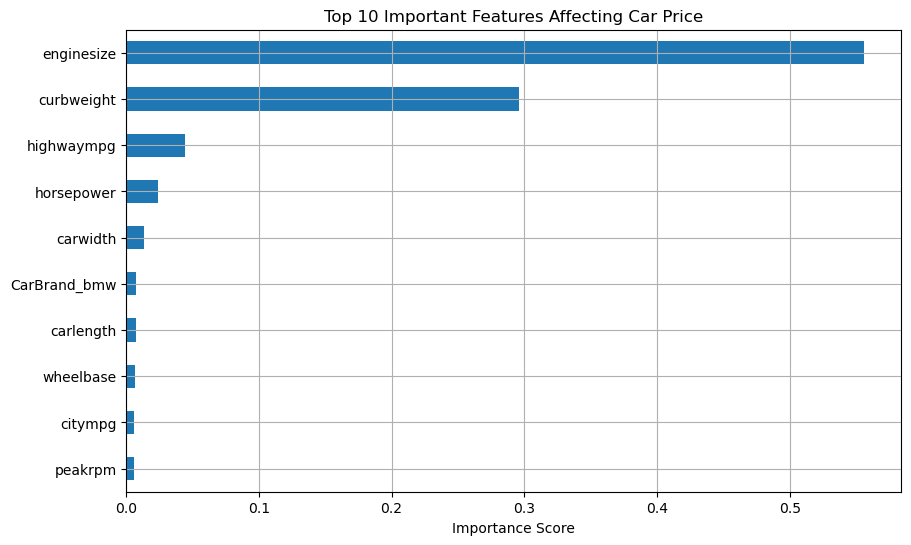

In [90]:
import matplotlib.pyplot as plt

# Extract feature importance from Random Forest
importances = pd.Series(model_rf.feature_importances_, index=X.columns)
top_10_features = importances.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
top_10_features.sort_values().plot(kind='barh')
plt.title("Top 10 Important Features Affecting Car Price")
plt.xlabel("Importance Score")
plt.grid(True)
plt.show()

#### Features like engine size, curb weight, and horsepower are major drivers of car price.

### 5. Hyperparameter Tuning
Improve the model’s performance by finding the best combination of parameter

In [95]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='r2',
                           verbose=1)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get best model
best_rf_model = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [97]:
from sklearn.metrics import r2_score

# Predict with best tuned model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate
r2_tuned = r2_score(y_test, y_pred_best_rf)
print(f"R² after tuning: {r2_tuned:.4f}")


R² after tuning: 0.9576


There is not big variation in the **R² Value** after tuning

### Summary: Car Price Prediction Analysis
This analysis it done to understand the key factors influencing car prices in the US market and build an accurate regression model to predict car prices. That will help the Chinese automobile company design and price cars competitively for the US market.

#### Key Steps Performed

**1. Data Preprocessing**
- Loaded and cleaned the dataset.
- Removed irrelevant columns (Car_ID, CarName).
- Applied one-hot encoding for categorical variables.
- Scaled features where needed (for SVR, Linear Regression).

**2. Model Implementation**
Trained and tested five regression models:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- Support Vector Regressor (SVR)

**3. Model Evaluation**
- Compared all models using R² Score, Mean Squared Error (MSE), and Mean Absolute Error (MAE).
- Visualized model performance using bar plots for intuitive comparison.

**4. Feature Importance Analysis**
Identified the top factors influencing car prices:
- Engine Size
- Curb Weight
- Horsepower
- Car Width
- Fuel Type
Helped stakeholders understand key levers to manipulate pricing.

**5. Hyperparameter Tuning**
- Used GridSearchCV to optimize the Random Forest model.
- Slight improvement observed in prediction accuracy.

## Best Performing Model: Random Forest Regressor
